In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolHash
import os, sys
HOME_DIR = os.path.join(os.getcwd(), '..')
sys.path.append(HOME_DIR)
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from rdkit import Chem
from rdkit.Chem import rdMolHash
import rdkit
from rdkit.Chem import Draw
from tqdm.notebook import tqdm

import matplotlib

def save_fig(ax,file_path):
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    plt = ax.get_figure()
    plt.savefig(file_path, transparent=True)
    return

# Process from full

In [2]:
data_full_min5 = pd.read_csv(os.path.join(HOME_DIR, "data/arylhalide_database_w_idx_min5.csv"))
data_full_min5

,RxnSMILES,Arylhalide,Canonical,RxnID,Yield,ScopeID,ScopeSize,aroma_c_index,halide_index
0,C[Si](C)(C)[Si:1]([CH3:2])([CH3:3])[CH3:4].I[C...,I[C:11]1=[CH:9][CH:7]=[C:6]([Cl:5])[CH:8]=[CH:...,Clc1ccc(I)cc1,12980746,67.0,9,10,1,0
1,C[Si](C)(C)[Si:9]([CH3:10])([CH3:11])[CH3:12]....,I[C:6]1=[CH:4][C:2]([Cl:1])=[CH:3][C:5]([Cl:7]...,Clc1cc(Cl)cc(I)c1,12980747,65.0,9,10,1,0
2,C[Si](C)(C)[Si:11]([CH3:12])([CH3:13])[CH3:14]...,I[C:10]1=[CH:8][CH:6]=[C:5]([C:1]([CH3:2])([CH...,CC(C)(C)c1ccc(I)cc1,12980741,71.0,9,10,1,0
3,C[Si](C)(C)[Si:1]([CH3:2])([CH3:3])[CH3:4].I[C...,I[C:11]1=[CH:9][CH:7]=[C:6]([F:5])[CH:8]=[CH:10]1,Fc1ccc(I)cc1,12980744,74.0,9,10,1,0
4,C[Si](C)(C)[Si:9]([CH3:10])([CH3:11])[CH3:12]....,I[C:6]1=[CH:4][C:2]([CH3:1])=[CH:3][C:5]([CH3:...,Cc1cc(C)cc(I)c1,12980740,77.0,9,10,1,0
...,...,...,...,...,...,...,...,...,...
64187,Br[C:1]1=[CH:2][C:4]2=[C:6]([CH:5]=[CH:3]1)[CH...,Br[C:1]1=[CH:2][C:4]2=[C:6]([CH:5]=[CH:3]1)[CH...,Brc1ccc2ccccc2c1,22184995,77.0,633578,7,1,0
64188,Br[C:1]1=[CH:3][CH:5]=[C:7]2[C:4](=[CH:2]1)[C:...,Br[C:1]1=[CH:3][CH:5]=[C:7]2[C:4](=[CH:2]1)[C:...,Brc1ccc2sc3ccccc3c2c1,21838100,73.0,633578,7,1,0
64189,Br[C:19]1=[CH:17][CH:15]=[C:14]([O:12][CH3:13]...,Br[C:19]1=[CH:17][CH:15]=[C:14]([O:12][CH3:13]...,COc1ccc(Br)cc1,22185457,74.0,633578,7,1,0
64190,Br[C:1]1=[CH:2][C:4]2=[C:6]([CH:5]=[CH:3]1)[CH...,Br[C:1]1=[CH:2][C:4]2=[C:6]([CH:5]=[CH:3]1)[CH...,Brc1ccc2ccccc2c1,22185449,77.0,633578,7,1,0


/home/whgao/tmp/ipykernel_374174/354326735.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_full_min5['Yield'], kde=False, bins=20, ax=ax)


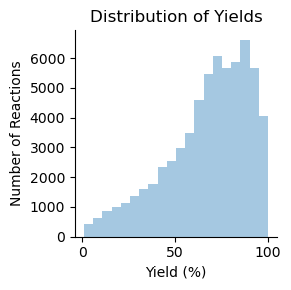

In [4]:
# f, ax = plt.subplots(figsize=(3, 3))

# sns.distplot(scope_sizes, bins=40, kde=False, ax=ax)
# plt.xlim(3, 32)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.xlabel('Scope Size')
# plt.ylabel('Count')
# plt.title('Distribution of Scope Sizes')

# plt.tight_layout()

# # plt.show()
# plt.savefig('scope_size_dist.png', dpi=200)



f, ax = plt.subplots(figsize=(3, 3))

sns.distplot(data_full_min5['Yield'], kde=False, bins=20, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.title('Yield Distribution', fontsize=14)
plt.xlabel('Yield (%)')
plt.ylabel('Number of Reactions')
plt.title('Distribution of Yields')
plt.tight_layout()

# plt.show()
plt.savefig('yield_dist_new.png', dpi=200)
# save_fig(ax, 'yield_dist_new.pdf')
# plt.savefig('yield_dist_new.png', dpi=200)

In [5]:
scope_list = data_full_min5.ScopeID.unique()
std_list = []

for scope_id in scope_list:
    std_list.append(data_full_min5[data_full_min5.ScopeID == scope_id]['Yield'].std())

std_list = np.array(std_list)
std_list.mean(), std_list.std()

(11.53010587739023, 7.957773173779775)

/home/whgao/tmp/ipykernel_374174/3016433892.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(std_list, kde=False, bins=20, ax=ax)


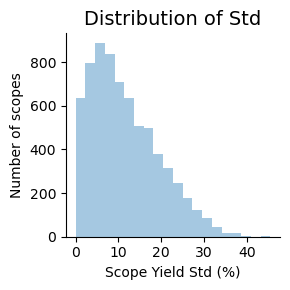

In [6]:
f, ax = plt.subplots(figsize=(3, 3))

sns.distplot(std_list, kde=False, bins=20, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.title('Yield Distribution', fontsize=14)
plt.xlabel('Scope Yield Std (%)')
plt.ylabel('Number of scopes')
plt.title('Distribution of Std', fontsize=14)
plt.tight_layout()

# plt.show()
plt.savefig('yield_std_dist.png', dpi=200)

In [3]:
data_full_min5.Canonical.value_counts()

Canonical
Ic1ccccc1                                                  1080
COc1ccc(I)cc1                                               951
Brc1ccccc1                                                  916
Cc1ccc(I)cc1                                                823
COc1ccc(Br)cc1                                              805
                                                           ... 
Oc1cc(Cl)cc(CNC2CCN(CCCN3CCCCC3)CC2)c1                        1
Oc1cc(Cl)cc(N2CCN(CCCN3CCCCC3)CC2)c1                          1
CN1CCCN(Cc2ccc(Cl)cc2O)CC1                                    1
CCOCc1ccc(Br)cc1OCC                                           1
Brc1ccc(-c2ccc3c(c2)C(c2ccccc2)(c2ccccc2)c2ccccc2-3)cc1       1
Name: count, Length: 20798, dtype: int64

In [4]:
sum_to_now = []
sum = 0
for val in tqdm(data_full_min5.Canonical.value_counts()):
    sum += val
    sum_to_now.append(sum)

  0%|          | 0/20798 [00:00<?, ?it/s]

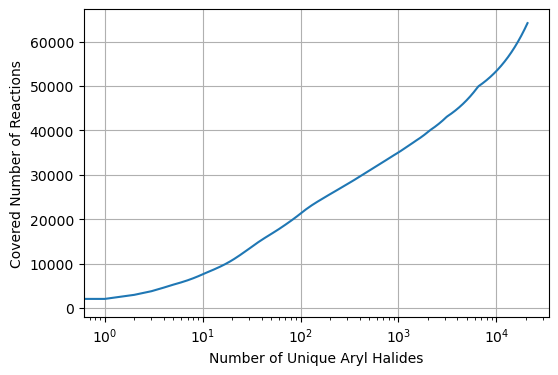

In [8]:
f = plt.figure(figsize=(6, 4))
plt.plot(sum_to_now)
plt.grid()
plt.xscale('log')
plt.xlabel('Number of Unique Aryl Halides')
plt.ylabel('Covered Number of Reactions')
# plt.show()
plt.savefig("unique_arylhalide_covered.png", dpi=300)

In [26]:
data_full_to_use = data_full_min5.Canonical.value_counts()[:500]
data_full_to_use

Canonical
Ic1ccccc1                                           1080
COc1ccc(I)cc1                                        951
Brc1ccccc1                                           916
Cc1ccc(I)cc1                                         823
COc1ccc(Br)cc1                                       805
                                                    ... 
O=C(Nc1nc2ccc(F)c(Cl)c2s1)c1ccc([N+](=O)[O-])cc1      12
Cc1c(C(N)=O)n(C)c2c(Br)cc(C#N)cc12                    12
O=C(Nc1nc2ccc(F)c(Cl)c2s1)c1cccc([N+](=O)[O-])c1      12
O=C(Nc1ccccc1)c1ccccc1I                               12
Fc1ccc(I)cc1F                                         12
Name: count, Length: 500, dtype: int64

In [33]:
c_index_list, x_index_list = [], []
smi_list = []
for smi in data_full_to_use.keys():
    temp = data_full_min5[data_full_min5['Canonical'] == smi].iloc[0, :]
    c_index_list.append(temp['aroma_c_index'])
    x_index_list.append(temp['halide_index'])
    smi_list.append(temp['Arylhalide'])

In [34]:
df = pd.DataFrame({
    'smiles': smi_list,
    'c_index': c_index_list,
    'x_index': x_index_list
})
df

,smiles,c_index,x_index
0,I[C:5]1=[CH:6][CH:8]=[CH:10][CH:9]=[CH:7]1,1,0
1,I[C:8]1=[CH:6][CH:4]=[C:3]([O:1][CH3:2])[CH:5]...,1,0
2,Br[C:1]1=[CH:2][CH:4]=[CH:6][CH:5]=[CH:3]1,1,0
3,I[C:11]1=[CH:9][CH:7]=[C:6]([CH3:5])[CH:8]=[CH...,1,0
4,Br[C:8]1=[CH:6][CH:4]=[C:3]([O:1][CH3:2])[CH:5...,1,0
...,...,...,...
495,Cl[C:1]1=[C:2]2[C:4](=[CH:9][CH:7]=[C:3]1[F:6]...,1,0
496,Br[C:6]1=[C:3]2[N:2]([CH3:1])[C:4]([C:7]([NH2:...,1,0
497,Cl[C:1]1=[C:2]2[C:4](=[CH:9][CH:7]=[C:3]1[F:6]...,1,0
498,I[C:6]1=[C:4]([C:1]([NH:2][C:5]2=[CH:8][CH:12]...,1,0


In [35]:
df.to_csv("../data/most_frequent.csv", index=False)

# Compare

In [4]:
data_hammett = pd.read_csv("../data/Hammett_xtb.csv")
data_hammett

,SMILES,constant,position,c_index,x_index,sasa,xtb_e_homo,xtb_e_lumo,ip,ea,...,electrofugality,nucleofugality,charge_c,bond_order_c_x,fukui_electro,fukui_nucleo,fukui_radical,fukui_dual,fukui_electro_local,fukui_nucleo_local
0,CN(C)c1ccc(Br)cc1,-0.83,p,6,7,5.200122,-0.354921,-0.231152,12.212410,3.378349,...,7.858757,1.959998,0.069681,0.970854,0.041328,0.038438,0.039883,0.002890,0.036319,0.038438
1,CN(C)c1cccc(Br)c1,-0.16,m,7,8,5.170121,-0.356704,-0.234833,12.374825,3.471494,...,8.060588,1.906268,0.081037,0.974230,0.075022,0.019259,0.047140,0.055763,0.064031,0.019259
2,CNc1ccc(Br)cc1,-0.70,p,5,6,5.300124,-0.362723,-0.235003,12.501747,3.420988,...,8.190147,1.959412,0.068252,0.965646,0.036474,0.041536,0.039005,-0.005062,0.032252,0.041536
3,CNc1cccc(Br)c1,-0.21,m,6,7,5.240122,-0.365412,-0.233783,12.685237,3.418142,...,8.393695,1.982317,0.082459,0.963714,0.068854,0.020315,0.044584,0.048539,0.057058,0.020315
4,CCNc1ccc(Br)cc1,-0.61,p,6,7,5.080119,-0.360762,-0.233601,12.415475,3.385898,...,8.086172,1.976799,0.067469,0.969161,0.034515,0.040600,0.037557,-0.006085,0.030533,0.040600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,O=[N+]([O-])c1ccc(Br)cc1,0.78,p,6,7,5.130120,-0.440944,-0.362599,14.650016,6.934924,...,12.095661,0.202721,0.098893,1.014061,0.048079,0.024496,0.036288,0.023582,0.073836,0.024496
57,O=[N+]([O-])c1cccc(Br)c1,0.71,m,7,8,5.100119,-0.435079,-0.365891,14.621812,6.939413,...,12.068040,0.198815,0.093822,1.005941,0.022638,0.028532,0.025585,-0.005894,0.030099,0.028532
58,[N-]=[N+]=Nc1ccc(Br)cc1,0.08,p,6,7,5.200122,-0.411616,-0.319756,13.767252,5.324274,...,10.229308,0.829782,0.085058,0.986238,0.025300,0.031861,0.028580,-0.006561,0.028120,0.031861
59,[N-]=[N+]=Nc1cccc(Br)c1,0.37,m,7,8,5.160121,-0.409316,-0.315302,13.713626,5.584718,...,10.286664,0.680320,0.089189,0.986089,0.023493,0.023910,0.023702,-0.000417,0.027841,0.023910


In [5]:
data_mf = pd.read_csv('../data/most_frequent.csv')
data_mf

,smiles,c_index,x_index
0,I[C:5]1=[CH:6][CH:8]=[CH:10][CH:9]=[CH:7]1,1,0
1,I[C:8]1=[CH:6][CH:4]=[C:3]([O:1][CH3:2])[CH:5]...,1,0
2,Br[C:1]1=[CH:2][CH:4]=[CH:6][CH:5]=[CH:3]1,1,0
3,I[C:11]1=[CH:9][CH:7]=[C:6]([CH3:5])[CH:8]=[CH...,1,0
4,Br[C:8]1=[CH:6][CH:4]=[C:3]([O:1][CH3:2])[CH:5...,1,0
...,...,...,...
495,Cl[C:1]1=[C:2]2[C:4](=[CH:9][CH:7]=[C:3]1[F:6]...,1,0
496,Br[C:6]1=[C:3]2[N:2]([CH3:1])[C:4]([C:7]([NH2:...,1,0
497,Cl[C:1]1=[C:2]2[C:4](=[CH:9][CH:7]=[C:3]1[F:6]...,1,0
498,I[C:6]1=[C:4]([C:1]([NH:2][C:5]2=[CH:8][CH:12]...,1,0


In [6]:
data_informers = pd.read_csv('../data/chemistry_informers.csv')
data_informers

,smiles,c_index,x_index
0,BrC1=CC2=C(N3C(CC(OC)=O)CC2)C(NC(C3=O)=O)=C1,1,0
1,BrC1=CC=C2C(C(N(C)CC3=C(C(OCC)=O)N=CN23)=O)=C1,1,0
2,O=C1OC(C)(C)C(C2=CC=C(S(=O)(C)=O)C=C2)=C1OC3=C...,22,23
3,BrC1=CC=C(F)C2=C1CN(C(O[C@H]3CN(C(OC(C)(C)C)=O...,1,0
4,BrC1=CC(C(C([C@H]2N(C(OCC3=CC=CC=C3)=O)CCC2)=O...,1,0
5,BrC(C=N1)=CC(CCC2=C/3C=CC(Cl)=C2)=C1C3=C4CCN(C...,1,0
6,BrC1=CC(F)=CC2=C1N(CC3=CC=C(Cl)C=C3)C4=C2CC[C@...,1,0
7,BrC1=CC=CC2=C1CN(C(O[C@@H]3C[C@@H](C(OC)=O)N(C...,1,0
8,FC1=CC(OC2CCN(C3=NOC(C4=NN(CC(O)=O)N=N4)=C3)CC...,25,26
9,BrC1=NC(C(NCC2=CC=C(F)C=C2)=O)=C(O)C3=NC=CC=C31,1,0


In [7]:
data_hammett_all = pd.read_csv('../data/Hammett_all.csv')
data_hammett_all

,SMILES,position,c_index,x_index
0,CN(C)c1ccc(Br)cc1,p,6,7
1,CN(C)c1cccc(Br)c1,m,7,8
2,CN(C)c1ccccc1Br,o,8,9
3,CNc1ccc(Br)cc1,p,5,6
4,CNc1cccc(Br)c1,m,6,7
...,...,...,...,...
335,O=[N+]([O-])c1ccccc1F,o,8,9
336,[N-]=[N+]=Nc1ccc(F)cc1,p,6,7
337,[N-]=[N+]=Nc1cccc(F)c1,m,7,8
338,[N-]=[N+]=Nc1ccccc1F,o,8,9


In [8]:
data_buyable = pd.read_csv('../data/buyable_aryl_bromides.csv')
data_buyable

,smiles,c_index,x_index,in_doyle,informer
0,BrC1=CC=C(C=O)C=C1,1,0,False,False
1,BrC1=CC=CC=C1,1,0,False,False
2,CC(=O)C1=CC=C(Br)C=C1,6,7,False,False
3,COC1=CC=C(Br)C=C1,5,6,False,False
4,CC1=CC=C(Br)C=C1,4,5,False,False
...,...,...,...,...,...
2694,IC1=C(F)C=C(N2C[C@H](CN3C=CN=N3)OC2=O)C=C1,1,0,False,True
2695,IC1=CC=C(N=C(CCC)N(CC2=CC=C(C3=C(S(=O)(NC(C)(C...,1,0,False,True
2696,ClC1=CC2=C([C@H](C(NC(C)=O)(C)C)CC23CCN(C(OC(C...,1,0,False,True
2697,ClC1=CC=C(NC(O[C@]2(C#CC3CC3)C(F)(F)F)=O)C2=C1,1,0,False,True


In [7]:
len(data_hammett), len(data_mf), len(data_informers), len(data_hammett_all), len(data_buyable)

(61, 500, 18, 340, 2681)

In [8]:
temp_list = data_mf.smiles.to_list() + data_buyable.smiles.to_list()
nonred_list = []
for smi in temp_list:
    mol = Chem.MolFromSmiles(smi)
    [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
    nonred_list.append(Chem.MolToSmiles(mol, canonical=True))
len(set(nonred_list))


3099

In [9]:
temp_list = data_hammett.SMILES.to_list() + data_buyable.smiles.to_list()
nonred_list = []
for smi in temp_list:
    mol = Chem.MolFromSmiles(smi)
    [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
    nonred_list.append(Chem.MolToSmiles(mol, canonical=True))
len(set(nonred_list))

2714

In [18]:
data_informers

,smiles,c_index,x_index
0,BrC1=CC2=C(N3C(CC(OC)=O)CC2)C(NC(C3=O)=O)=C1,1,0
1,BrC1=CC=C2C(C(N(C)CC3=C(C(OCC)=O)N=CN23)=O)=C1,1,0
2,O=C1OC(C)(C)C(C2=CC=C(S(=O)(C)=O)C=C2)=C1OC3=C...,22,23
3,BrC1=CC=C(F)C2=C1CN(C(O[C@H]3CN(C(OC(C)(C)C)=O...,1,0
4,BrC1=CC(C(C([C@H]2N(C(OCC3=CC=CC=C3)=O)CCC2)=O...,1,0
5,BrC(C=N1)=CC(CCC2=C/3C=CC(Cl)=C2)=C1C3=C4CCN(C...,1,0
6,BrC1=CC(F)=CC2=C1N(CC3=CC=C(Cl)C=C3)C4=C2CC[C@...,1,0
7,BrC1=CC=CC2=C1CN(C(O[C@@H]3C[C@@H](C(OC)=O)N(C...,1,0
8,FC1=CC(OC2CCN(C3=NOC(C4=NN(CC(O)=O)N=N4)=C3)CC...,25,26
9,BrC1=NC(C(NCC2=CC=C(F)C=C2)=O)=C(O)C3=NC=CC=C31,1,0


In [19]:
smi_list = data_mf.smiles.to_list() + data_hammett_all.SMILES.to_list() + data_informers.smiles.to_list()
c_index_list = data_mf.c_index.to_list() + data_hammett_all.c_index.to_list() + data_informers.c_index.to_list()
x_index_list = data_mf.x_index.to_list() + data_hammett_all.x_index.to_list() + data_informers.x_index.to_list()
can_smi_list = []
for i, smi in tqdm(enumerate(smi_list)):
    mol = Chem.MolFromSmiles(smi)
    [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
    can_smi_list.append(Chem.MolToSmiles(mol, canonical=True))

df = pd.DataFrame({'smiles': smi_list, 'canonical': can_smi_list, 'c_index': c_index_list, 'x_index': x_index_list})


0it [00:00, ?it/s]

In [20]:
df

,smiles,canonical,c_index,x_index
0,I[C:5]1=[CH:6][CH:8]=[CH:10][CH:9]=[CH:7]1,Ic1ccccc1,1,0
1,I[C:8]1=[CH:6][CH:4]=[C:3]([O:1][CH3:2])[CH:5]...,COc1ccc(I)cc1,1,0
2,Br[C:1]1=[CH:2][CH:4]=[CH:6][CH:5]=[CH:3]1,Brc1ccccc1,1,0
3,I[C:11]1=[CH:9][CH:7]=[C:6]([CH3:5])[CH:8]=[CH...,Cc1ccc(I)cc1,1,0
4,Br[C:8]1=[CH:6][CH:4]=[C:3]([O:1][CH3:2])[CH:5...,COc1ccc(Br)cc1,1,0
...,...,...,...,...
853,IC1=C(F)C=C(N2C[C@H](CN3C=CN=N3)OC2=O)C=C1,O=C1O[C@@H](Cn2ccnn2)CN1c1ccc(I)c(F)c1,1,0
854,IC1=CC=C(N=C(CCC)N(CC2=CC=C(C3=C(S(=O)(NC(C)(C...,CCCc1nc2ccc(I)cc2c(=O)n1Cc1ccc(-c2ccccc2S(=O)(...,1,0
855,ClC1=CC2=C([C@H](C(NC(C)=O)(C)C)CC23CCN(C(OC(C...,CC(=O)NC(C)(C)[C@@H]1CC2(CCN(C(=O)OC(C)(C)C)CC...,1,0
856,ClC1=CC=C(NC(O[C@]2(C#CC3CC3)C(F)(F)F)=O)C2=C1,O=C1Nc2ccc(Cl)cc2[C@@](C#CC2CC2)(C(F)(F)F)O1,1,0


In [22]:
df.drop_duplicates(subset=['canonical'], keep='first').reset_index(drop=True).to_csv('../data/ah_selected.csv', index=False)

In [3]:
df = pd.read_csv("../data/ah_selected.csv")
df

,smiles,canonical,c_index,x_index
0,I[C:5]1=[CH:6][CH:8]=[CH:10][CH:9]=[CH:7]1,Ic1ccccc1,1,0
1,I[C:8]1=[CH:6][CH:4]=[C:3]([O:1][CH3:2])[CH:5]...,COc1ccc(I)cc1,1,0
2,Br[C:1]1=[CH:2][CH:4]=[CH:6][CH:5]=[CH:3]1,Brc1ccccc1,1,0
3,I[C:11]1=[CH:9][CH:7]=[C:6]([CH3:5])[CH:8]=[CH...,Cc1ccc(I)cc1,1,0
4,Br[C:8]1=[CH:6][CH:4]=[C:3]([O:1][CH3:2])[CH:5...,COc1ccc(Br)cc1,1,0
...,...,...,...,...
762,IC1=C(F)C=C(N2C[C@H](CN3C=CN=N3)OC2=O)C=C1,O=C1O[C@@H](Cn2ccnn2)CN1c1ccc(I)c(F)c1,1,0
763,IC1=CC=C(N=C(CCC)N(CC2=CC=C(C3=C(S(=O)(NC(C)(C...,CCCc1nc2ccc(I)cc2c(=O)n1Cc1ccc(-c2ccccc2S(=O)(...,1,0
764,ClC1=CC2=C([C@H](C(NC(C)=O)(C)C)CC23CCN(C(OC(C...,CC(=O)NC(C)(C)[C@@H]1CC2(CCN(C(=O)OC(C)(C)C)CC...,1,0
765,ClC1=CC=C(NC(O[C@]2(C#CC3CC3)C(F)(F)F)=O)C2=C1,O=C1Nc2ccc(Cl)cc2[C@@](C#CC2CC2)(C(F)(F)F)O1,1,0


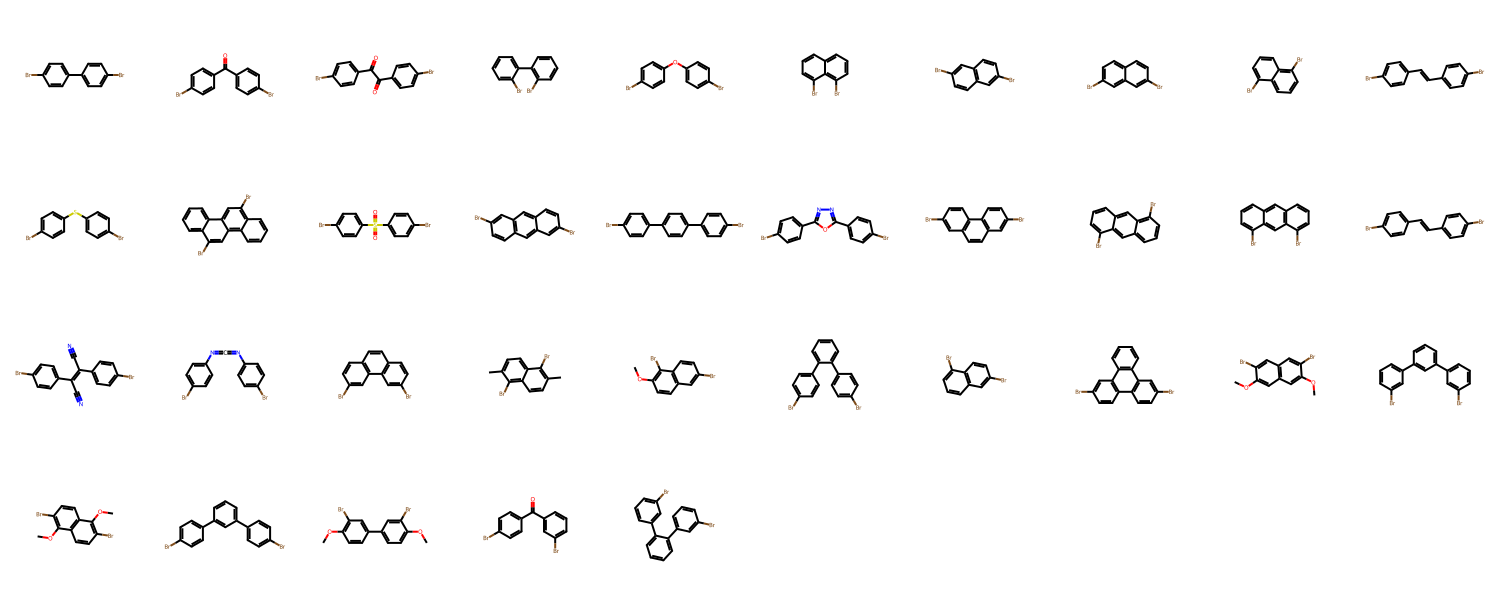

In [24]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in multiple_aromatic_halides], molsPerRow=10,subImgSize=(150,150),useSVG=True)

In [3]:
data = pd.read_csv("../data/ah_selected_autoqchem.csv")
data

,smiles,c_index,x_index,global_number_of_atoms,global_charge,global_multiplicity,global_dipole,global_molar_mass,global_molar_volume,global_electronic_spatial_extent,...,local_NPA_Rydberg,local_NPA_total,local_NMR_shift,local_NMR_anisotropy,local_ES_root_Mulliken_charge,local_ES_root_NPA_charge,local_ES_root_NPA_core,local_ES_root_NPA_valence,local_ES_root_NPA_Rydberg,local_ES_root_NPA_total
0,Ic1ccccc1,1,0,12.0,0.0,1.0,1.6679,204.0100,615.024,1115.9615,...,0.02697,6.21456,59.4613,98.7501,-0.248305,-0.25947,1.99874,4.22962,0.03111,6.25947
1,Ic1ccc(OC)cc1,1,0,16.0,0.0,1.0,2.6921,234.0362,1093.317,2040.0494,...,0.02649,6.24252,70.7973,83.6621,-0.235398,-0.24487,1.99876,4.21315,0.03297,6.24487
2,Brc1ccccc1,1,0,12.0,0.0,1.0,1.7385,157.0095,903.584,1225.4453,...,0.02176,6.10821,54.4081,107.0036,0.063748,-0.10703,1.99861,4.08679,0.02164,6.10703
3,Ic1ccc(C)cc1,1,0,15.0,0.0,1.0,2.1001,218.0368,1220.972,1584.3176,...,0.02672,6.22100,62.8121,93.5116,-0.244045,-0.25055,1.99874,4.22017,0.03164,6.25055
4,Brc1ccc(OC)cc1,1,0,16.0,0.0,1.0,2.7364,187.0357,1176.890,2371.2266,...,0.02135,6.13472,64.2446,93.2286,0.084508,-0.07174,1.99857,4.05177,0.02140,6.07174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,Ic1c(F)cc(N2C[C@H](Cn3ccnn3)OC2=O)cc1,1,0,30.0,0.0,1.0,6.7206,388.1395,1830.183,9430.2534,...,0.02646,6.32139,80.6536,78.6819,-0.355671,-0.32377,1.99866,4.29199,0.03312,6.32377
759,Ic1ccc2nc(CCC)n(Cc3ccc(-c4c(S(=O)(NC(C)(C)C)=O...,1,0,66.0,0.0,1.0,5.8570,615.5278,4063.149,28878.2024,...,0.02672,6.22858,62.6337,94.5522,-0.319702,-0.17989,1.99863,4.15534,0.02592,6.17989
760,Clc1cc2c(cc1C)[C@H](C(NC(C)=O)(C)C)CC21CCN(C(O...,1,0,65.0,0.0,1.0,3.5202,435.0051,3751.365,19158.0870,...,0.02128,6.02482,53.0342,90.8154,-0.146366,-0.02558,1.99850,4.00491,0.02217,6.02558
761,Clc1ccc2c(c1)[C@@](C#CC1CC1)(C(F)(F)F)OC(=O)N2,1,0,30.0,0.0,1.0,4.0266,315.6788,2041.573,6460.4729,...,0.02187,6.06039,60.0616,96.1063,-0.060917,0.01525,1.99854,3.96389,0.02232,5.98475


In [19]:
data_hammett_all

,SMILES,position,c_index,x_index
0,CN(C)c1ccc(Br)cc1,p,6,7
1,CN(C)c1cccc(Br)c1,m,7,8
2,CN(C)c1ccccc1Br,o,8,9
3,CNc1ccc(Br)cc1,p,5,6
4,CNc1cccc(Br)c1,m,6,7
...,...,...,...,...
335,O=[N+]([O-])c1ccccc1F,o,8,9
336,[N-]=[N+]=Nc1ccc(F)cc1,p,6,7
337,[N-]=[N+]=Nc1cccc(F)c1,m,7,8
338,[N-]=[N+]=Nc1ccccc1F,o,8,9


In [20]:
def sani_smi(smi):
    mol = Chem.MolFromSmiles(smi)
    [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
    return Chem.MolToSmiles(mol)

cas_smiles = [sani_smi(smiles) for smiles in data_mf.smiles]
data['from_cas'] = [True if sani_smi(data.smiles[i]) in cas_smiles else False for i in range(len(data))]

Hammett_smiles = [sani_smi(smiles) for smiles in data_hammett_all.SMILES]
data['from_hammett'] = [True if sani_smi(data.smiles[i]) in Hammett_smiles else False for i in range(len(data))]

informer_smiles = [sani_smi(smiles) for smiles in data_informers.smiles]
data['from_informer'] = [True if sani_smi(data.smiles[i]) in informer_smiles else False for i in range(len(data))]

In [21]:
data

,smiles,c_index,x_index,global_number_of_atoms,global_charge,global_multiplicity,global_dipole,global_molar_mass,global_molar_volume,global_electronic_spatial_extent,...,local_NMR_anisotropy,local_ES_root_Mulliken_charge,local_ES_root_NPA_charge,local_ES_root_NPA_core,local_ES_root_NPA_valence,local_ES_root_NPA_Rydberg,local_ES_root_NPA_total,from_cas,from_hammett,from_informer
0,Ic1ccccc1,1,0,12.0,0.0,1.0,1.6679,204.0100,615.024,1115.9615,...,98.7501,-0.248305,-0.25947,1.99874,4.22962,0.03111,6.25947,True,True,False
1,Ic1ccc(OC)cc1,1,0,16.0,0.0,1.0,2.6921,234.0362,1093.317,2040.0494,...,83.6621,-0.235398,-0.24487,1.99876,4.21315,0.03297,6.24487,True,True,False
2,Brc1ccccc1,1,0,12.0,0.0,1.0,1.7385,157.0095,903.584,1225.4453,...,107.0036,0.063748,-0.10703,1.99861,4.08679,0.02164,6.10703,True,True,False
3,Ic1ccc(C)cc1,1,0,15.0,0.0,1.0,2.1001,218.0368,1220.972,1584.3176,...,93.5116,-0.244045,-0.25055,1.99874,4.22017,0.03164,6.25055,True,True,False
4,Brc1ccc(OC)cc1,1,0,16.0,0.0,1.0,2.7364,187.0357,1176.890,2371.2266,...,93.2286,0.084508,-0.07174,1.99857,4.05177,0.02140,6.07174,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,Ic1c(F)cc(N2C[C@H](Cn3ccnn3)OC2=O)cc1,1,0,30.0,0.0,1.0,6.7206,388.1395,1830.183,9430.2534,...,78.6819,-0.355671,-0.32377,1.99866,4.29199,0.03312,6.32377,False,False,True
759,Ic1ccc2nc(CCC)n(Cc3ccc(-c4c(S(=O)(NC(C)(C)C)=O...,1,0,66.0,0.0,1.0,5.8570,615.5278,4063.149,28878.2024,...,94.5522,-0.319702,-0.17989,1.99863,4.15534,0.02592,6.17989,False,False,True
760,Clc1cc2c(cc1C)[C@H](C(NC(C)=O)(C)C)CC21CCN(C(O...,1,0,65.0,0.0,1.0,3.5202,435.0051,3751.365,19158.0870,...,90.8154,-0.146366,-0.02558,1.99850,4.00491,0.02217,6.02558,False,False,True
761,Clc1ccc2c(c1)[C@@](C#CC1CC1)(C(F)(F)F)OC(=O)N2,1,0,30.0,0.0,1.0,4.0266,315.6788,2041.573,6460.4729,...,96.1063,-0.060917,0.01525,1.99854,3.96389,0.02232,5.98475,False,False,True


In [22]:
data.from_cas.sum(), data.from_hammett.sum(), data.from_informer.sum()

(497, 339, 18)

In [23]:
data.to_csv('../data/ah_selected_autoqchem.csv', index=False)